# Basic CNN Practice using Torch 

In [1]:
from matplotlib import pyplot as plt 
import numpy as np

In [2]:
# imports 
import torch
from torch import nn
from torch.nn import functional as F
import torchvision
from torchvision import transforms
from torch import optim

In [3]:
device = torch.device ('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [4]:
# Hyperparameter 
batch_size = 32

##### Datasets and dataloader 

In [5]:
# Creating Transform object to transform the raw data to tensor
transform_obj = transforms.Compose([
    transforms.ToTensor(), transforms.Normalize(
        (0.5,0.5,0.5),(0.5,0.5,0.5) ) 
])

# Creating Torch datasets for train
train_set = torchvision.datasets.CIFAR10(
    root = './data', train = True,  download = True, transform = transform_obj)

# Creating Torch dataloader for train
train_data_loader = torch.utils.data.DataLoader(
    train_set, batch_size = batch_size, shuffle = True, num_workers=2 )                                  


# Creating Torch datasets for test
test_set = torchvision.datasets.CIFAR10(
    root = './data', train =False,  download = True, transform = transform_obj)

# Creating Torch dataloader for test
test_data_loader = torch.utils.data.DataLoader(
    test_set, batch_size = batch_size, shuffle = False, num_workers=2 )  

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [9]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog','frog', 'horse', 'ship', 'truck')

def imshow(image):
    image = image/2+.5
    image = image.numpy()
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.show()




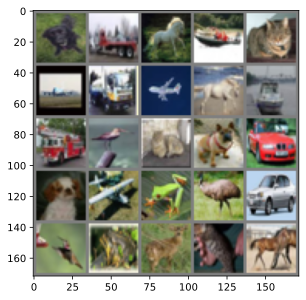

In [11]:
# one batch view of random trrainning images 
data_iter = iter(train_data_loader)
images , labels = data_iter.__next__()




image_grid = torchvision.utils.make_grid(images[0:25],nrow =5)
imshow(image_grid)

#### Define Model 

In [12]:
class ConvoNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,32,3)
        self.maxPooling1 = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(32,64,3)
        self.conv3 = nn.Conv2d(64,64,3)
        self.fc1 = nn.Linear(64*4*4,64)
        self.fc2 = nn.Linear(64,10)
    def forward (self, x):
        x = F.relu(self.conv1(x))
        x = self.maxPooling1(x)
        x = F.relu(self.conv2(x))
        x = self.maxPooling1(x)
        x = F.relu(self.conv3(x))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = ConvoNet().to(device)    
        
        

In [13]:
# Loss Function and Optimizer 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-3)


In [16]:
# Trainning Loop 
steps_per_epoch = len(train_data_loader)
def train(model, epoch):
    for e in range(epoch):
        running_loss = 0.0
        for ( inputs , labels) in train_data_loader :
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Forward Pass 
            out = model(inputs)
            # Calculating loss
            loss = criterion(out, labels)
            # set Previous gradient as zero
            optimizer.zero_grad()
            # Backward pass
            loss.backward() # calculate new gradient
            # Update Parameters 
            optimizer.step()
             
            running_loss += loss.item()
        
        print(f"[{epoch + 1}] Loss : {running_loss / steps_per_epoch :.3f}" )
        
    print("Done")
            
            
            

In [17]:
train(model , 10)

[11] Loss : 1.118
[11] Loss : 0.945
[11] Loss : 0.830
[11] Loss : 0.752
[11] Loss : 0.691
[11] Loss : 0.639
[11] Loss : 0.593
[11] Loss : 0.550
[11] Loss : 0.511
[11] Loss : 0.476
Done
